In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### 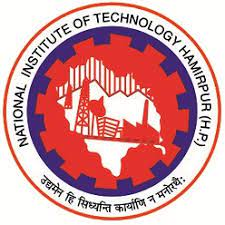

---
## National Institute of Technology, Hamirpur
---
----------------------------------------------------------------------------------------
### Computer Science & Engineering Department
----------------------------------------------------------------------------------------
# **CSD_426**
## Data Ware Housing and Data Mining LAB
---

> Submitted By: **Abhishek Kumar, 185540**


> Submitted To: **Dr. Vijay Kumar Chahar**


# Questions:
1. Construct a scatterplot with x-axis to be the mass variable and y-axis to be the age variable.Moreover, determine the color of the points based on the class of the candidate (0 or 1).
2. Create a distance matrix for the data.
3. Make a hierarchical clustering analysis using the single linkage method. Then create an object that contains only two clusters.
4. Make a hierarchical clustering analysis using the complete linkage method. Then create an object that contains only two clusters.
5. Construct the trees that are produced by Questions 2 and 3 and draw the two clusters (at the plots).
6. Construct two scatterplot with x-axis to be the mass variable and y-axis to be the age variable. Moreover, determine the color of the points based on the cluster that those points belong to. Each scatterplot is for different clustering method.
7. Construct a scatterplot with x-axis to be the mass variable and y-axis to be the age variable. Moreover, determine the color of the points based on the cluster (retrieved from k-mean method) that those points belong to.
8. Construct a scatterplot with x-axis to be the mass variable and y-axis to be the age variable. Moreover, determine the color of the points based on the cluster (retrieved from k-median method) that those points belong to.

In [18]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 791 kB/s            


In [20]:
import warnings
warnings.filterwarnings("ignore")

#basic libraries
import os
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
import time

# Visualisation module
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode


from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected=True)


In [25]:
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv", index_col = 0, encoding="utf-8")
df.head(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [26]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [23]:
# Description of the dataset
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


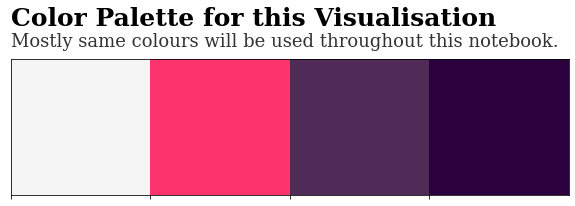

In [37]:
#color palette of visualisation
colors = ["#f6f5f5","#fe346e","#512b58","#2c003e"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size = 2.5)
plt.text(-0.5,-0.75,"Color Palette for this Visualisation",{"font":"serif","size":25,"weight":"bold"})
plt.text(-0.5,-0.60,"Mostly same colours will be used throughout this notebook.",{"font":"serif","size":18,"weight":"normal"},alpha=0.8)
plt.show()

### 1. Construct a scatterplot with x-axis to be the mass variable and y-axis to be the age variable.Moreover, determine the color of the points based on the class of the candidate (0 or 1).

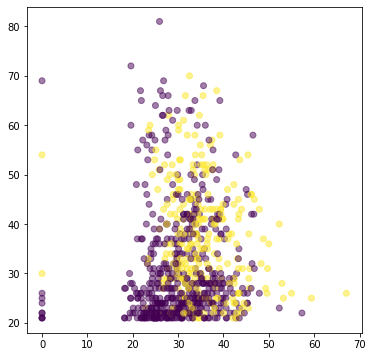

In [13]:
fig = plt.figure(figsize = (6,6))

plt.scatter(df["BMI"],df["Age"],c=df["Outcome"], alpha =0.5)
plt.show()